In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data1 = pd.read_csv('athletes.csv', parse_dates = ['born_date', 'died_date'])
data2 = pd.read_csv('olympic_games_results.csv')
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [3]:
# Visualizar columnas, tipo de datos y nulls de los datasets
df1.rename(columns={'NOC': 'noc'}, inplace=True)
# Tratamiento de datos
df1['noc'] = df1['noc'].astype('category')
valores_nulos = df1.isnull().sum()
print(valores_nulos)
print('-' * 80)
print(df1['noc'].unique())
print('-' * 80)
print(df1.info())

athlete_id           0
name                 0
born_date         1807
born_city        34592
born_region      34592
born_country     34592
noc                  1
height_cm        38849
weight_kg        43430
died_date       111560
dtype: int64
--------------------------------------------------------------------------------
['France', 'Great Britain', 'Germany West Germany', 'West Germany', 'Germany', ..., 'ROC', 'Democratic People's Republic of Korea Korea T..., 'France Sweden', 'Austria Czechia', NaN]
Length: 697
Categories (696, object): ['Afghanistan', 'Albania', 'Albania Australia', 'Albania Bulgaria', ..., 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe']
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   athlete_id    145500 non-null  int64  

In [4]:
cols_to_convert = ['type', 'discipline', 'noc', 'medal'] # También se cabió el tipo de datos de la columna Team, tuvo que quitarse del código porque al eliminar la columna daba problemas a ejecutarlo
df2[cols_to_convert] = df2[cols_to_convert].astype('category')
#df2['place'] = df2['place'].astype(int)
print(df2['noc'].unique())
print('-' * 80)
print(df2['place'].unique())
print('-' * 80)
# Pasar year a string para quitar el .0 y luego pasarlo a fecha

print('-' * 80)
print(df2.info())

['FRA', 'GBR', 'FRG', 'GER', 'GHA', ..., 'KOS', 'EOR', 'SSD', 'COR', NaN]
Length: 230
Categories (229, object): ['AFG', 'AHO', 'ALB', 'ALG', ..., 'YMD', 'YUG', 'ZAM', 'ZIM']
--------------------------------------------------------------------------------
[ 17.  nan  32.   8.   4.  15.   3.   9.   2.  33.  49.   1.   5.  31.
  14.  16.   7.  13.  29.  25.  21.  11.  48.  26.  41.  61.   6.  81.
  75.  57.  19.  52.  12.  50.  35.  36.  55.  24.  63.  22.  40.  18.
  23.  44.  53.  46.  43.  60.  58.  73.  20.  71.  80.  76.  62.  27.
  30.  45.  34.  39.  51.  70.  37.  38.  47.  10.  74.  56.  64.  28.
  42.  54.  59.  72.  77.  65.  69.  79.  66.  83.  82.  67.  68.  84.
  78.  86. 106. 100. 117.  91.  89. 101.  98. 114.  88. 112. 102.  96.
 103.  94. 109.  92. 104.  85.  87. 110. 113.  99.  90.  93. 108. 105.
 107.  95. 116. 111.  97. 115. 120. 118. 121. 123. 124. 129. 122. 132.
 119. 130. 125. 127. 128. 126. 131. 133. 134. 178. 151. 180. 177. 174.
 159. 157. 161. 168. 144. 135. 166.

In [5]:
# Duplicates
print(f"{df1.duplicated().sum()} duplicates in athletes")
print('-' * 80)
print(f"{df2.duplicated().sum()} duplicates in results")


0 duplicates in athletes
--------------------------------------------------------------------------------
23 duplicates in results


In [6]:
# Remove duplicates
df2.drop_duplicates(inplace = True)
print(f"{df2.duplicated().sum()} duplicates in results")
print('-' * 80)
print(df2.info())
print('-' * 80)
print(df2.isnull().sum())
'''
# Eliminar columna team
df2.drop(columns=['team'], inplace=True)
'''

0 duplicates in results
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 304314 entries, 0 to 304336
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   year        304314 non-null  float64 
 1   type        304314 non-null  category
 2   discipline  304313 non-null  category
 3   event       304314 non-null  object  
 4   as          304314 non-null  object  
 5   athlete_id  304314 non-null  int64   
 6   noc         304313 non-null  category
 7   place       280355 non-null  float64 
 8   tied        304314 non-null  bool    
 9   medal       43630 non-null   category
dtypes: bool(1), category(4), float64(2), int64(1), object(2)
memory usage: 15.7+ MB
None
--------------------------------------------------------------------------------
year               0
type               0
discipline         1
event              0
as                

"\n# Eliminar columna team\ndf2.drop(columns=['team'], inplace=True)\n"

In [7]:
print(len(df2['event'].unique()))

961


In [8]:
# Mostrar registros con la palabra Olympic
print(df2[df2['event'].str.contains('Olympic', case=False)].shape[0])

296898


In [9]:
# Registros sin la palabra Olympic
print(df2[~df2['event'].str.contains('Olympic', case=False)].shape[0])

7416


In [10]:
# Mostrar las fechas por orden
sorted_years = df2['year'].unique()
sorted_years.sort()
print(sorted_years)

[1896. 1900. 1904. 1908. 1912. 1920. 1924. 1928. 1932. 1936. 1948. 1952.
 1956. 1960. 1964. 1968. 1972. 1976. 1980. 1984. 1988. 1992. 1994. 1996.
 1998. 2000. 2002. 2004. 2006. 2008. 2010. 2012. 2014. 2016. 2018. 2020.
 2022.]


In [11]:
# Mostrar cuantos Intercalated hay
print(df2[df2['event'].str.contains('Intercalated', case=False)].shape[0])

0


In [12]:
print(df2[~df2['event'].str.contains('Olympic', case=False)].shape[0])

7416


In [13]:
print(list(df2['event'].unique()))

['Singles, Men (Olympic)', 'Doubles, Men (Olympic)', 'Doubles, Mixed (Olympic)', 'Épée, Individual, Men (Olympic)', 'Tennis', 'Doubles, Covered Courts, Mixed (Olympic)', 'Singles, Covered Courts, Men (Olympic)', 'Doubles, Covered Courts, Men (Olympic)', 'Polo', 'Singles, Covered Courts, Women (Olympic)', 'Singles, Women (Olympic)', 'Doubles, Women (Olympic)', 'Team, Women (Olympic)', 'Hockey, Men (Olympic)', '100 metres, Men (Olympic)', '400 metres, Men (Olympic)', '800 metres, Men (Olympic)', '110 metres Hurdles, Men (Olympic)', 'High Jump, Men (Olympic)', 'Pole Vault, Men (Olympic)', 'Long Jump, Men (Olympic)', 'Triple Jump, Men (Olympic)', 'Team, Men (Olympic)', 'Swimming (Aquatics)', '100 metres Freestyle, Men (Olympic)', '500 metres Freestyle, Men (Olympic)', '1,200 metres Freestyle, Men (Olympic)', 'Architecture, Open (Olympic)', 'Weightlifting', 'Unlimited, Two Hands, Men (Olympic)', 'Wrestling', 'Unlimited Class, Greco-Roman, Men (Olympic)', 'Athletics', 'Shot Put, Men (Olympic

In [14]:
print(df2[df2['event'].str.contains('painting', case=False)].shape[0])

0


In [15]:
print(df2[df2['event'].str.contains('open', case=False)].shape[0])

12280


In [16]:
print(df2[df2['event'].str.contains('non-medal', case=False)].shape[0])

0


In [17]:
# Eliminamos valores con non-medal
df2 = df2[~df2['event'].str.contains('non-medal', case=False)]
print(df2.info())
print('-' * 80)
print(df2[df2['event'].str.contains('non-medal', case=False)].shape[0])

<class 'pandas.core.frame.DataFrame'>
Index: 304314 entries, 0 to 304336
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   year        304314 non-null  float64 
 1   type        304314 non-null  category
 2   discipline  304313 non-null  category
 3   event       304314 non-null  object  
 4   as          304314 non-null  object  
 5   athlete_id  304314 non-null  int64   
 6   noc         304313 non-null  category
 7   place       280355 non-null  float64 
 8   tied        304314 non-null  bool    
 9   medal       43630 non-null   category
dtypes: bool(1), category(4), float64(2), int64(1), object(2)
memory usage: 15.7+ MB
None
--------------------------------------------------------------------------------
0


In [18]:
# Eliminamos valores con Intercalated
df2 = df2[~df2['event'].str.contains('Intercalated', case=False)]
print(df2.info())
print('-' * 80)
print(df2[df2['event'].str.contains('Intercalated', case=False)].shape[0])

<class 'pandas.core.frame.DataFrame'>
Index: 304314 entries, 0 to 304336
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   year        304314 non-null  float64 
 1   type        304314 non-null  category
 2   discipline  304313 non-null  category
 3   event       304314 non-null  object  
 4   as          304314 non-null  object  
 5   athlete_id  304314 non-null  int64   
 6   noc         304313 non-null  category
 7   place       280355 non-null  float64 
 8   tied        304314 non-null  bool    
 9   medal       43630 non-null   category
dtypes: bool(1), category(4), float64(2), int64(1), object(2)
memory usage: 15.7+ MB
None
--------------------------------------------------------------------------------
0


In [19]:
# Eliminamos valores con Painting
df2 = df2[~df2['event'].str.contains('Painting', case=False)]
print(df2.info())
print('-' * 80)
print(df2[df2['event'].str.contains('Painting', case=False)].shape[0])

<class 'pandas.core.frame.DataFrame'>
Index: 304314 entries, 0 to 304336
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   year        304314 non-null  float64 
 1   type        304314 non-null  category
 2   discipline  304313 non-null  category
 3   event       304314 non-null  object  
 4   as          304314 non-null  object  
 5   athlete_id  304314 non-null  int64   
 6   noc         304313 non-null  category
 7   place       280355 non-null  float64 
 8   tied        304314 non-null  bool    
 9   medal       43630 non-null   category
dtypes: bool(1), category(4), float64(2), int64(1), object(2)
memory usage: 15.7+ MB
None
--------------------------------------------------------------------------------
0


In [20]:
print(df2[~df2['event'].str.contains('Olympic', case=False)].shape[0])
print('-' * 80)
print(df2[df2['event'].str.contains('YOG', case=False)].shape[0])

7416
--------------------------------------------------------------------------------
5842


In [21]:
# Filtrar eventos que NO contienen 'Olympic' ni 'YOG' y obtener los únicos
non_olympic_yog_unique_events = df2[
    ~df2['event'].str.contains('Olympic', case=False) & 
    ~df2['event'].str.contains('YOG', case=False)
]['event'].unique()

# Convertir a lista si deseas
non_olympic_yog_unique_events_list = non_olympic_yog_unique_events.tolist()
2615
# Imprimir los eventos únicos
print(non_olympic_yog_unique_events_list)

['Tennis', 'Polo', 'Swimming (Aquatics)', 'Weightlifting', 'Wrestling', 'Athletics', 'Golf', 'Football (Football)', 'Canoe Marathon (Canoeing)', 'Equestrian Eventing (Equestrian)', 'Equestrian Dressage (Equestrian)', 'Equestrian Driving (Equestrian)', 'Cycling Track (Cycling)', 'Cycling Mountain Bike (Cycling)', 'Cycling Road (Cycling)', 'Tug-Of-War', 'Racquets', 'Hockey', 'Modern Pentathlon', 'Water Polo (Aquatics)', 'Rowing', 'Shooting', 'Fencing', 'Art Competitions', 'Artistic Gymnastics (Gymnastics)', 'Handball', 'Cross Country Skiing (Skiing)', 'Diving (Aquatics)', 'Glíma', 'Boxing', 'Rugby (Rugby)', 'Ski Jumping (Skiing)', 'Nordic Combined (Skiing)', 'Basketball (Basketball)', 'Baseball (Baseball/Softball)', 'Curling', 'Luge', 'Military Ski Patrol (Skiing)', 'Skeleton (Bobsleigh)', 'Speed Skating (Skating)', 'Ice Hockey (Ice Hockey)', 'Bobsleigh (Bobsleigh)', 'Alpine Skiing (Skiing)', 'Marathon Swimming (Aquatics)', 'Skijoring (Skiing)', 'Short Track Speed Skating (Skating)', 'Sn

In [22]:
# Filtrar eventos que NO contienen 'Olympic' ni 'YOG'
filtered_events = df2[
    ~df2['event'].str.contains('Olympic', case=False) & 
    ~df2['event'].str.contains('YOG', case=False)
]

# Contar la frecuencia de cada evento
event_counts = filtered_events['event'].value_counts()

# Imprimir los resultados
print(event_counts)

event
Cycling Track (Cycling)                353
Nordic Combined (Skiing)               167
Water Polo (Aquatics)                  149
Ski Jumping (Skiing)                   145
Canoe Marathon (Canoeing)              111
Cross Country Skiing (Skiing)           88
Swimming (Aquatics)                     78
Equestrian Eventing (Equestrian)        74
Athletics                               46
Modern Pentathlon                       41
Fencing                                 26
Baseball (Baseball/Softball)            24
Marathon Swimming (Aquatics)            24
Equestrian Dressage (Equestrian)        23
Tug-Of-War                              22
Artistic Gymnastics (Gymnastics)        20
Shooting                                19
Tennis                                  16
Cycling Mountain Bike (Cycling)         15
3-on-3 Ice Hockey (Ice Hockey)          13
Wrestling                               13
Military Ski Patrol (Skiing)            11
Weightlifting                           10
Cycli

In [23]:
# Filtrar eventos que NO contienen 'Olympic', 'YOG' y paréntesis
filtered_events = df2[
    ~df2['event'].str.contains('Olympic', case=False) & 
    ~df2['event'].str.contains('YOG', case=False) &
    ~df2['event'].str.contains(r'\(.*\)', regex=True)  # Verifica que no haya paréntesis
]

# Contar la frecuencia de cada evento que cumple con las condiciones
event_counts = filtered_events['event'].value_counts()

# Imprimir los resultados
print(event_counts)


event
Athletics            46
Modern Pentathlon    41
Fencing              26
Tug-Of-War           22
Shooting             19
Tennis               16
Wrestling            13
Weightlifting        10
Hockey                5
Art Competitions      5
Luge                  4
Rowing                3
Glíma                 3
Curling               2
Racquets              2
Boxing                2
Polo                  1
Golf                  1
Handball              1
Name: count, dtype: int64


In [24]:
# Filtrar eventos que NO contienen 'Olympic', 'YOG', paréntesis y que tienen registros vacíos en 'place'
filtered_events = df2[
    ~df2['event'].str.contains('Olympic', case=False) & 
    ~df2['event'].str.contains('YOG', case=False) &
    ~df2['event'].str.contains(r'\(.*\)', regex=True) &  # Sin paréntesis
    df2['place'].isnull()  # Sin registros en 'place'
]

# Contar la frecuencia de cada evento que cumple con las condiciones
event_counts = filtered_events['event'].value_counts()

# Imprimir los resultados
print(event_counts)

filtered_events_2020 = filtered_events[filtered_events['year'] == 2020]

# Seleccionar las columnas 'event', 'year' y 'place'
results = filtered_events_2020[['event', 'year', 'place']]

# Imprimir los resultados
print(results)

event
Athletics            46
Modern Pentathlon    41
Fencing              26
Tug-Of-War           22
Shooting             19
Tennis               16
Wrestling            13
Weightlifting        10
Hockey                5
Art Competitions      5
Luge                  4
Rowing                3
Glíma                 3
Curling               2
Racquets              2
Boxing                2
Polo                  1
Golf                  1
Handball              1
Name: count, dtype: int64
Empty DataFrame
Columns: [event, year, place]
Index: []


In [25]:
# Filtrar eventos que NO contienen 'Olympic', 'YOG', paréntesis, tienen registros vacíos en 'place'
# y son eventos de 'mixed sports'
filtered_events = df2[
    ~df2['event'].str.contains('Olympic', case=False) & 
    ~df2['event'].str.contains('YOG', case=False) &
    ~df2['event'].str.contains(r'\(.*\)', regex=True) &  # Sin paréntesis
    df2['place'].isnull() &  # Sin registros en 'place'
    df2['event'].str.contains('mixed', case=False)  # Eventos de mixed sports
]

# Contar la frecuencia de cada evento que cumple con las condiciones
event_counts = filtered_events['event'].value_counts()

# Imprimir los resultados
print(event_counts)


Series([], Name: count, dtype: int64)


In [26]:
# Filtrar disciplinas donde el evento contiene 'mixed'
mixed_discipline_unique = df2[df2['event'].str.contains('mixed sports', case=False)]['discipline'].unique()

# Convertir a lista si deseas
mixed_discipline_unique_list = mixed_discipline_unique.tolist()

# Imprimir los resultados
print(mixed_discipline_unique_list)


[]


In [27]:
# Contar registros donde 'place' está vacío (nulo)
empty_place_count = df2['place'].isnull().sum()

# Imprimir el resultado
print(f"Número de registros con 'place' vacío: {empty_place_count}")

Número de registros con 'place' vacío: 23959


In [28]:
print('-' * 80)
print(df2.isnull().sum())

--------------------------------------------------------------------------------
year               0
type               0
discipline         1
event              0
as                 0
athlete_id         0
noc                1
place          23959
tied               0
medal         260684
dtype: int64


In [29]:
# Eliminar los registros mixed sports cuyo valor en place sea null
df2 = df2[~((df2['event'].str.contains('mixed sports', case=False)) & (df2['place'].isnull()))]

# Imprimir el número de registros restantes
print(f"Número de registros restantes: {df2.shape[0]}")

Número de registros restantes: 304314


In [30]:
print('-' * 80)
print(df2.isnull().sum())
# Se mantienen los registros con valores null en la columna place ya que sirven para el anlisis

--------------------------------------------------------------------------------
year               0
type               0
discipline         1
event              0
as                 0
athlete_id         0
noc                1
place          23959
tied               0
medal         260684
dtype: int64


In [31]:
registros_null = df2[df2['year'].isnull()]

print(registros_null)

Empty DataFrame
Columns: [year, type, discipline, event, as, athlete_id, noc, place, tied, medal]
Index: []


In [32]:
# Conteo de disciplinas que nos queda al final para la segunda pregunta
valores_unicos = df2['discipline'].unique()
valores = valores_unicos.tolist()
print(valores)
print('-' * 80)
print(len(valores))

['Tennis', 'Table Tennis', 'Fencing', 'Badminton', 'Hockey', 'Athletics', 'Art Competitions', 'Modern Pentathlon', 'Archery', 'Boxing', 'Softball (Baseball/Softball)', 'Baseball (Baseball/Softball)', 'Sailing', 'Golf', 'Jeu De Paume', 'Basketball (Basketball)', 'Cycling Road (Cycling)', 'Handball', 'Bobsleigh (Bobsleigh)', 'Canoe Sprint (Canoeing)', 'Canoe Slalom (Canoeing)', 'Canoe Marathon (Canoeing)', 'Shooting', 'Rowing', 'Cycling Track (Cycling)', 'Polo', 'Rugby (Rugby)', 'Equestrian Dressage (Equestrian)', 'Equestrian Eventing (Equestrian)', 'Equestrian Jumping (Equestrian)', 'Tug-Of-War', 'Lacrosse', 'Diving (Aquatics)', 'Equestrian Vaulting (Equestrian)', 'Equestrian Driving (Equestrian)', 'Cycling Mountain Bike (Cycling)', 'Speed Skating (Skating)', 'Football (Football)', 'Cross Country Skiing (Skiing)', 'Racquets', 'Cricket', 'Croquet', 'Motorboating', 'Swimming (Aquatics)', 'Ice Hockey (Ice Hockey)', 'Artistic Gymnastics (Gymnastics)', 'Rhythmic Gymnastics (Gymnastics)', 'We

In [33]:
# Count de participantes para la primera pregunta
valores_unicos = df2['athlete_id'].unique()
valores = valores_unicos.tolist()
print(len(valores))

144610


In [34]:
# Filtrar filas donde 'year' es null y 'medal' es gold, silver o bronze
filtro = df2[df2['year'].isnull() & df2['medal'].isin(['Gold', 'Silver', 'Bronze'])]

print(len(filtro))

0


In [35]:
# Atletas con year null y con medallas
filtro = df2[df2['year'].isnull() & df2['medal'].isin(['Gold', 'Silver', 'Bronze'])]
nombres = filtro['as']
print(nombres.tolist())

[]


In [36]:
# Eliminar registros donde la columna 'year' tiene valores nulos
df2 = df2.dropna(subset=['year'])

# Verificar el tamaño del DataFrame después de la eliminación
print(len(df2))

print('-' * 80)
print(df2.isnull().sum())

304314
--------------------------------------------------------------------------------
year               0
type               0
discipline         1
event              0
as                 0
athlete_id         0
noc                1
place          23959
tied               0
medal         260684
dtype: int64


In [37]:
# Filtrar registros donde 'discipline' y 'noc' son nulos
filtro = df2[df2['discipline'].isnull() & df2['noc'].isnull()]

# Mostrar los nombres de la columna 'as' de esos registros
nombres_nulos = filtro['as']

# Mostrar los nombres
print(nombres_nulos)

304336    Charlotta Säfvenberg
Name: as, dtype: object


In [38]:
# Total histórico de atletas con medallas
filtro = df2[df2['medal'].isin(['Gold', 'Silver', 'Bronze'])]
print(len(filtro))

43630


In [39]:
# Cambio de del tipo de dato de la columna year de float a int.
df2['year'] = df2['year'].astype(int)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 304314 entries, 0 to 304336
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   year        304314 non-null  int64   
 1   type        304314 non-null  category
 2   discipline  304313 non-null  category
 3   event       304314 non-null  object  
 4   as          304314 non-null  object  
 5   athlete_id  304314 non-null  int64   
 6   noc         304313 non-null  category
 7   place       280355 non-null  float64 
 8   tied        304314 non-null  bool    
 9   medal       43630 non-null   category
dtypes: bool(1), category(4), float64(1), int64(2), object(2)
memory usage: 15.7+ MB
None


In [40]:
# Se intentó rellenar los null del resgistro pero no se consiguió guardar los cambios en el CSV
'''
df2.loc[304337, 'discipline'] =  'Alpine Skiing (Skiing)'
df2.loc[304337, 'noc'] = 'SWE'
print('-' * 80)
# Guardar el DataFrame modificado de vuelta en el CSV
df2.to_csv('olympic_games_results.csv', index=False)
# Mostrar solo el registro con el índice 304337
registro = df2.loc[304337]

# Imprimir el registro completo
print(registro)
'''

"\ndf2.loc[304337, 'discipline'] =  'Alpine Skiing (Skiing)'\ndf2.loc[304337, 'noc'] = 'SWE'\nprint('-' * 80)\n# Guardar el DataFrame modificado de vuelta en el CSV\ndf2.to_csv('olympic_games_results.csv', index=False)\n# Mostrar solo el registro con el índice 304337\nregistro = df2.loc[304337]\n\n# Imprimir el registro completo\nprint(registro)\n"

In [41]:
'''
# Eliminar la fila con índice específico y modificar el DataFrame original directamente
df2.drop(304337, inplace=True)

# Verificar que la fila fue eliminada
print(df2)
'''
# Se eliminó la columna, da error al ejecutarlo otra vez y por eso está como comentario

'\n# Eliminar la fila con índice específico y modificar el DataFrame original directamente\ndf2.drop(304337, inplace=True)\n\n# Verificar que la fila fue eliminada\nprint(df2)\n'

In [42]:
#df2.to_csv('olympic_cleaned_lunes.csv', index=False, encoding='utf-8')

In [43]:
#df1.to_csv('athlete_cleaned_lunes.csv', index=False, encoding='utf-8')

In [44]:
#Unificación de datasets
# Seleccionar las columnas que deseas de cada DataFrame
df1_subset = df1[['athlete_id', 'name', 'height_cm', 'weight_kg' ]]
df2_subset = df2[['athlete_id','year','discipline','event','noc','place','medal']]

# Realizar el merge usando las columnas seleccionadas
df_unificado = pd.merge(df1_subset, df2_subset, on='athlete_id', how='inner')

# Mostrar el resultado
print(df_unificado)

        athlete_id                   name  height_cm  weight_kg  year  \
0                1  Jean-François Blanchy        NaN        NaN  1912   
1                1  Jean-François Blanchy        NaN        NaN  1912   
2                1  Jean-François Blanchy        NaN        NaN  1920   
3                1  Jean-François Blanchy        NaN        NaN  1920   
4                1  Jean-François Blanchy        NaN        NaN  1920   
...            ...                    ...        ...        ...   ...   
304309      148983          Marián Skupek      196.0      108.0  2022   
304310      148984          Elsa Fermbäck        NaN        NaN  2022   
304311      148985          Hilma Lövblom        NaN        NaN  2022   
304312      148985          Hilma Lövblom        NaN        NaN  2022   
304313      148986   Charlotta Säfvenberg        NaN        NaN  2022   

                    discipline                          event  noc  place  \
0                       Tennis         Singles

In [45]:
#Creacion de un dataset unificado con culumnas de df1 y df2.
#df_unificado.to_csv('ds_unificado.csv', index=False, encoding='utf-8')

In [46]:
data3=pd.read_csv('ds_unificado.csv')
df3=pd.DataFrame(data3)

In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304314 entries, 0 to 304313
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   athlete_id  304314 non-null  int64  
 1   name        304314 non-null  object 
 2   height_cm   235783 non-null  float64
 3   weight_kg   226354 non-null  float64
 4   year        304314 non-null  int64  
 5   discipline  304313 non-null  object 
 6   event       304314 non-null  object 
 7   noc         304313 non-null  object 
 8   place       280355 non-null  float64
 9   medal       43630 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 23.2+ MB


In [48]:
#Eliminacion de un registro 'extraviado' con valores nulos 

# Definir las condiciones de valores nulos en las columnas 'name' y 'sport'
condicion = df3['discipline'].isnull() & df3['noc'].isnull()

# Eliminar las filas que cumplen con ambas condiciones (valores nulos en 'name' y 'sport')
df_limpio = df3[~condicion]

# Mostrar el DataFrame después de eliminar las filas
print("\nDataFrame después de eliminar los registros con valores nulos en 'name' y 'sport':")
print(df_limpio.info())


DataFrame después de eliminar los registros con valores nulos en 'name' y 'sport':
<class 'pandas.core.frame.DataFrame'>
Index: 304313 entries, 0 to 304312
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   athlete_id  304313 non-null  int64  
 1   name        304313 non-null  object 
 2   height_cm   235783 non-null  float64
 3   weight_kg   226354 non-null  float64
 4   year        304313 non-null  int64  
 5   discipline  304313 non-null  object 
 6   event       304313 non-null  object 
 7   noc         304313 non-null  object 
 8   place       280354 non-null  float64
 9   medal       43630 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 25.5+ MB
None


In [49]:
# Iteracion 1 ----- Participacion historica por paises

# Agrupar por la columna 'noc' y contar los valores únicos de 'athlete_id'
df_grouped = df3.groupby('noc')['athlete_id'].nunique().reset_index()

# Renombrar la columna para mayor claridad
df_grouped.rename(columns={'athlete_id': 'unique_athletes'}, inplace=True)

# Ordenar los resultados por la cantidad de atletas (de mayor a menor)
df_grouped_sorted = df_grouped.sort_values(by='unique_athletes', ascending=False)

# Mostrar el resultado
print("\nNúmero de atletas distintos por país:")
print(df_grouped_sorted)
print('-' * 80)
print(df_grouped_sorted.head(10))
print('-' * 80)
print(df_grouped_sorted.tail(10))


Número de atletas distintos por país:
     noc  unique_athletes
215  USA            10039
75   GBR             6436
70   FRA             6350
36   CAN             5303
101  ITA             5144
..   ...              ...
223  YAR               10
208  TUV                8
225  YMD                5
187  SSD                5
144  NBO                2

[229 rows x 2 columns]
--------------------------------------------------------------------------------
     noc  unique_athletes
215  USA            10039
75   GBR             6436
70   FRA             6350
36   CAN             5303
101  ITA             5144
80   GER             5142
105  JPN             4614
12   AUS             4165
193  SWE             3915
190  SUI             3131
--------------------------------------------------------------------------------
     noc  unique_athletes
151  NRU               12
167  RHO               12
202  TLS               11
31   BRU               11
109  KIR               11
223  YAR             

In [50]:
# Filtrar los registros con medalla de 'Gold'
df_gold = df3[df3['medal'] == 'Gold']

# Filtrar los registros con medalla de 'Silver'
df_silver = df3[df3['medal'] == 'Silver']

# Filtrar los registros con medalla de 'Bronze'
df_bronze = df3[df3['medal'] == 'Bronze']
print('-' * 80)
# Mostrar los DataFrames separados por tipo de medalla
print("\nDataFrame con medalla Gold:")
print(df_gold)
print(len(df_gold))
print('-' * 80)
print("\nDataFrame con medalla Silver:")
print(df_silver)
print(len(df_silver))
print('-' * 80)
print("\nDataFrame con medalla Bronze:")
print(df_bronze)
print(len(df_bronze))

--------------------------------------------------------------------------------

DataFrame con medalla Gold:
        athlete_id                 name  height_cm  weight_kg  year  \
39              12          Max Decugis        NaN        NaN  1920   
66              19       Maurice Germot        NaN        NaN  1912   
67              20         André Gobert        NaN        NaN  1912   
68              20         André Gobert        NaN        NaN  1912   
120             45     Charlotte Cooper        NaN        NaN  1900   
...            ...                  ...        ...        ...   ...   
304045      148811  Aleksandr Gallyamov        NaN        NaN  2022   
304047      148812      Mark Kondratyuk        NaN        NaN  2022   
304196      148903       Marco Odermatt        NaN        NaN  2022   
304232      148920           Anja Weber        NaN        NaN  2018   
304246      148931           Ryan Regez        NaN        NaN  2022   

                       discipline    

In [51]:

# Suponiendo que df3 es el DataFrame original con las columnas 'athlete_id', 'noc', 'medal', etc.

# Filtrar los registros con medalla de 'Gold'
df_gold = df3[df3['medal'] == 'Gold']
df_gold_grouped = df_gold.groupby('noc')['athlete_id'].nunique().reset_index()
df_gold_grouped.rename(columns={'athlete_id': 'gold_medals'}, inplace=True)

# Filtrar los registros con medalla de 'Silver'
df_silver = df3[df3['medal'] == 'Silver']
df_silver_grouped = df_silver.groupby('noc')['athlete_id'].nunique().reset_index()
df_silver_grouped.rename(columns={'athlete_id': 'silver_medals'}, inplace=True)

# Filtrar los registros con medalla de 'Bronze'
df_bronze = df3[df3['medal'] == 'Bronze']
df_bronze_grouped = df_bronze.groupby('noc')['athlete_id'].nunique().reset_index()
df_bronze_grouped.rename(columns={'athlete_id': 'bronze_medals'}, inplace=True)

# Unir los tres DataFrames (Gold, Silver, Bronze) por la columna 'noc' (país)
df_medals = pd.merge(df_gold_grouped, df_silver_grouped, on='noc', how='outer')
df_medals = pd.merge(df_medals, df_bronze_grouped, on='noc', how='outer')

# Añadir una columna con el total de medallas por país
df_medals['total_medals'] = df_medals['gold_medals'].fillna(0) + df_medals['silver_medals'].fillna(0) + df_medals['bronze_medals'].fillna(0)

df_medals_sorted = df_medals.sort_values(by='total_medals', ascending=False)

# Mostrar los DataFrames agrupados por tipo de medalla y país
print('-' * 80)
print("\nDataFrame con medallas por país:")
print(df_medals_sorted)
print('-' * 80)

--------------------------------------------------------------------------------

DataFrame con medallas por país:
     noc  gold_medals  silver_medals  bronze_medals  total_medals
148  USA       1976.0         1571.0         1330.0        4877.0
146  URS        815.0          605.0          606.0        2026.0
53   GER        602.0          642.0          711.0        1955.0
50   GBR        575.0          672.0          647.0        1894.0
47   FRA        472.0          585.0          640.0        1697.0
..   ...          ...            ...            ...           ...
133  TGA          NaN            1.0            NaN           1.0
40   ESA          NaN            1.0            NaN           1.0
11   BAR          NaN            NaN            1.0           1.0
15   BIH          NaN            NaN            1.0           1.0
0    AFG          NaN            NaN            1.0           1.0

[156 rows x 5 columns]
---------------------------------------------------------------------

In [52]:
# Filtrar los registros con medalla de 'Gold'
df_gold = df3[df3['medal'] == 'Gold']
df_gold_grouped = df_gold.groupby('noc')['athlete_id'].nunique().reset_index()
df_gold_grouped.rename(columns={'athlete_id': 'gold_medals'}, inplace=True)

# Filtrar los registros con medalla de 'Silver'
df_silver = df3[df3['medal'] == 'Silver']
df_silver_grouped = df_silver.groupby('noc')['athlete_id'].nunique().reset_index()
df_silver_grouped.rename(columns={'athlete_id': 'silver_medals'}, inplace=True)

# Filtrar los registros con medalla de 'Bronze'
df_bronze = df3[df3['medal'] == 'Bronze']
df_bronze_grouped = df_bronze.groupby('noc')['athlete_id'].nunique().reset_index()
df_bronze_grouped.rename(columns={'athlete_id': 'bronze_medals'}, inplace=True)

# Unir los tres DataFrames (Gold, Silver, Bronze) por la columna 'noc' (país)
#df_medals = pd.merge(df_gold_grouped, df_silver_grouped, on='noc', how='outer')
#df_medals = pd.merge(df_medals, df_bronze_grouped, on='noc', how='outer')

# Añadir una columna con el total de medallas por país
df_medals['total_medals'] = df_medals['gold_medals'].fillna(0) + df_medals['silver_medals'].fillna(0) + df_medals['bronze_medals'].fillna(0)

# Ordenar por medallas de oro, luego de plata, y luego de bronce
df_medals_sorted = df_medals.sort_values(by=['gold_medals', 'silver_medals', 'bronze_medals'], ascending=False)
'''
df_medals_gold = df_medals.sort_values(by=['gold_medals'], ascending=False)
df_medals_silver = df_medals.sort_values(by=['silver_medals'], ascending=False)
df_medals_bronze = df_medals.sort_values(by=['bronze_medals'], ascending=False)
# Mostrar el DataFrame con los resultados ordenados
print('-' * 80)
print("\nDataFrame con medallas por país, ordenado por oro, plata y bronce:")
print(df_medals_sorted)
print('-' * 80)

print(df_medals_gold.head(10))
print('-' * 80)
print(df_medals_silver.head(10))
print('-' * 80)
print(df_medals_bronze.head(10))
''' 

# Mostrar solo los primeros 10 países con el total de medallas
print('-' * 80)
print("\nDataFrame con medallas por país (Top 10, ordenado por oro, plata y bronce):")
for index, row in df_medals_sorted.head(10).iterrows():  # Aquí se usan los primeros 10 países
    print(f"{row['noc']} {row['gold_medals']:.1f} {row['silver_medals']:.1f} {row['bronze_medals']:.1f} Total {row['total_medals']:.1f}")
print('-' * 80)

# Ordenar el DataFrame por medallas de oro y mostrar el Top 10
df_gold_grouped_sorted = df_gold_grouped.sort_values(by='gold_medals', ascending=False)
print("\nTop 10 países con medallas de oro:")
for index, row in df_gold_grouped_sorted.head(10).iterrows():
    if row['gold_medals'] > 0:
        print(f"GOLD : {row['noc']} {row['gold_medals']}")

# Ordenar el DataFrame por medallas de plata y mostrar el Top 10
df_silver_grouped_sorted = df_silver_grouped.sort_values(by='silver_medals', ascending=False)
print("\nTop 10 países con medallas de plata:")
for index, row in df_silver_grouped_sorted.head(10).iterrows():
    if row['silver_medals'] > 0:
        print(f"SILVER : {row['noc']} {row['silver_medals']}")

# Ordenar el DataFrame por medallas de bronce y mostrar el Top 10
df_bronze_grouped_sorted = df_bronze_grouped.sort_values(by='bronze_medals', ascending=False)
print("\nTop 10 países con medallas de bronce:")
for index, row in df_bronze_grouped_sorted.head(10).iterrows():
    if row['bronze_medals'] > 0:
        print(f"BRONZE : {row['noc']} {row['bronze_medals']}")

--------------------------------------------------------------------------------

DataFrame con medallas por país (Top 10, ordenado por oro, plata y bronce):
USA 1976.0 1571.0 1330.0 Total 4877.0
URS 815.0 605.0 606.0 Total 2026.0
GER 602.0 642.0 711.0 Total 1955.0
GBR 575.0 672.0 647.0 Total 1894.0
FRA 472.0 585.0 640.0 Total 1697.0
ITA 465.0 468.0 487.0 Total 1420.0
CAN 461.0 457.0 507.0 Total 1425.0
SWE 426.0 491.0 466.0 Total 1383.0
RUS 339.0 342.0 380.0 Total 1061.0
CHN 318.0 361.0 321.0 Total 1000.0
--------------------------------------------------------------------------------

Top 10 países con medallas de oro:
GOLD : USA 1976
GOLD : URS 815
GOLD : GER 602
GOLD : GBR 575
GOLD : FRA 472
GOLD : ITA 465
GOLD : CAN 461
GOLD : SWE 426
GOLD : RUS 339
GOLD : CHN 318

Top 10 países con medallas de plata:
SILVER : USA 1571
SILVER : GBR 672
SILVER : GER 642
SILVER : URS 605
SILVER : FRA 585
SILVER : SWE 491
SILVER : ITA 468
SILVER : CAN 457
SILVER : AUS 401
SILVER : CHN 361

Top 10 país

In [53]:
# Seleccionar las columnas que deseas de cada DataFrame
df1_subset = df1[['athlete_id', 'name', 'height_cm', 'weight_kg']]
df2_subset = df2[['athlete_id', 'year', 'discipline' , 'event' , 'noc', 'place' ,  'medal']]

# Realizar el merge usando las columnas seleccionadas
df_unificado = pd.merge(df1_subset, df2_subset, on='athlete_id', how='inner')

# Mostrar el resultado
print(df_unificado)

        athlete_id                   name  height_cm  weight_kg  year  \
0                1  Jean-François Blanchy        NaN        NaN  1912   
1                1  Jean-François Blanchy        NaN        NaN  1912   
2                1  Jean-François Blanchy        NaN        NaN  1920   
3                1  Jean-François Blanchy        NaN        NaN  1920   
4                1  Jean-François Blanchy        NaN        NaN  1920   
...            ...                    ...        ...        ...   ...   
304309      148983          Marián Skupek      196.0      108.0  2022   
304310      148984          Elsa Fermbäck        NaN        NaN  2022   
304311      148985          Hilma Lövblom        NaN        NaN  2022   
304312      148985          Hilma Lövblom        NaN        NaN  2022   
304313      148986   Charlotta Säfvenberg        NaN        NaN  2022   

                    discipline                          event  noc  place  \
0                       Tennis         Singles

In [54]:
athletes_df = df3
#Paso 1: Cálculo del BMI
athletes_df['BMI'] = athletes_df['weight_kg'] / (athletes_df['height_cm'] / 100) ** 2  # Asegura que 'altura' esté en metros

#Paso 2: Calcular la media de BMI por disciplina
bmi_mean_per_discipline = athletes_df.groupby('discipline')['BMI'].mean().sort_values(ascending=False)

#Paso 3: Mostrar el resultado
print(bmi_mean_per_discipline.head(10))

discipline
Art Competitions                29.237879
Weightlifting                   27.463702
Bobsleigh (Bobsleigh)           27.061098
Rugby (Rugby)                   26.101349
Tug-Of-War                      26.076394
Baseball (Baseball/Softball)    25.685207
Judo                            25.430772
Rugby Sevens (Rugby)            25.341001
Ice Hockey (Ice Hockey)         25.066652
Wrestling                       25.027871
Name: BMI, dtype: float64


In [65]:
# Paso 1: Filtrar atletas con medalla y hacer una copia para evitar la advertencia
medalists_df = df3.dropna(subset=['medal', 'weight_kg', 'height_cm']).copy()

# Paso 2: Calcular el BMI para los atletas con medalla
medalists_df['BMI'] = medalists_df['weight_kg'] / (medalists_df['height_cm'] / 100) ** 2

# Paso 3: Calcular la media de BMI por disciplina
bmi_mean_per_discipline_medalists = medalists_df.groupby('discipline')['BMI'].mean().dropna().sort_values(ascending=False)

# Paso 4: Mostrar el resultado
print(bmi_mean_per_discipline_medalists.head(10))


discipline
Weightlifting                   27.940897
Bobsleigh (Bobsleigh)           27.122071
Rugby (Rugby)                   26.101349
Tug-Of-War                      25.951557
Judo                            25.859891
Baseball (Baseball/Softball)    25.729378
Rugby Sevens (Rugby)            25.567633
Wrestling                       25.299880
Ice Hockey (Ice Hockey)         25.120308
3x3 Basketball (Basketball)     25.013190
Name: BMI, dtype: float64


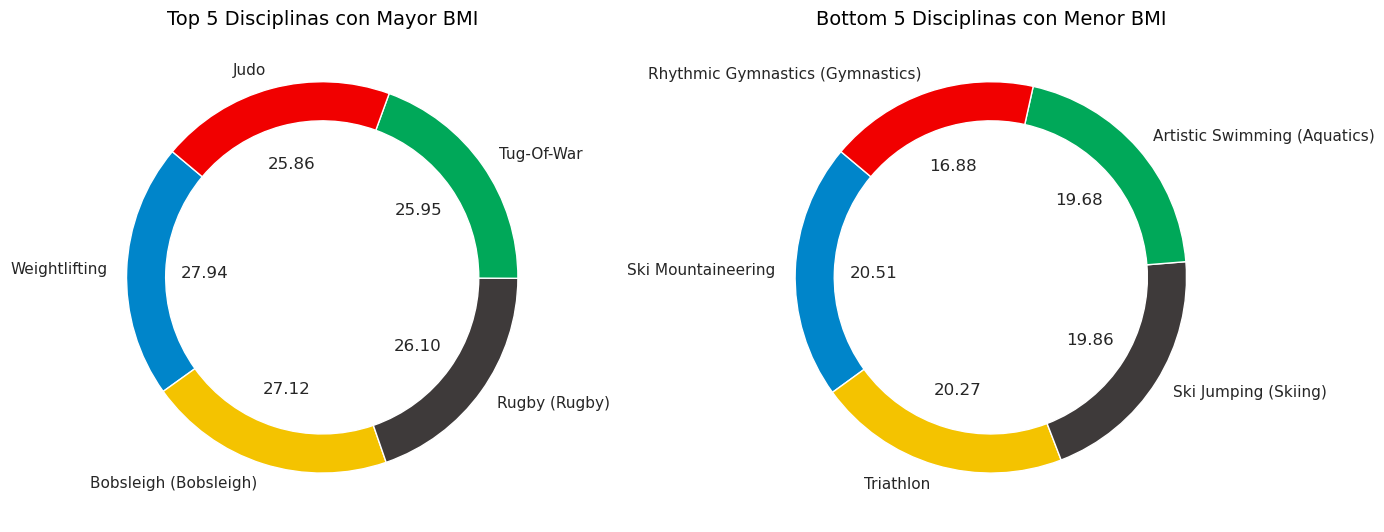

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

#PREGUNTA 3

# Paso 1: Filtrar atletas con medalla y hacer una copia para evitar la advertencia
medalists_df = df3.dropna(subset=['medal', 'weight_kg', 'height_cm']).copy()

# Paso 2: Calcular el BMI para los atletas con medalla
medalists_df['BMI'] = medalists_df['weight_kg'] / (medalists_df['height_cm'] / 100) ** 2

# Paso 3: Calcular la media de BMI por disciplina (excluyendo NaN en BMI)
bmi_mean_per_discipline_medalists = medalists_df.groupby('discipline')['BMI'].mean().dropna().sort_values(ascending=False)

# Paso 4: Filtrar el top 5 con mayor BMI y el bottom 5 con menor BMI
top_5_bmi = bmi_mean_per_discipline_medalists.head(5)
bottom_5_bmi = bmi_mean_per_discipline_medalists.tail(5)

# Colores de los anillos olímpicos
olympic_colors = ['#0085CA', '#F4C300', '#3E3A3A', '#00A859', '#F10000']

# Función para personalizar el formato del BMI
def bmi_format(value):
    return f'{value:.2f}'

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Paso 5: Crear los gráficos de pastel (Pie chart) para el top 5 y bottom 5
plt.figure(figsize=(14, 8))

# Pie chart para las 5 disciplinas con mayor BMI (anillo)
plt.subplot(1, 2, 1)  # Subgráfico 1
wedges, texts, autotexts = plt.pie(
    top_5_bmi, 
    labels=top_5_bmi.index, 
    autopct='%1.1f%%',  # Esto se reemplaza con los BMI en el siguiente paso
    startangle=140, 
    colors=olympic_colors,
    wedgeprops={'width': 0.2}  # Esto hace que el gráfico sea un anillo más fino (width=0.2)
)

# Reemplazamos los porcentajes por los valores de BMI
for i, autotext in enumerate(autotexts):
    autotext.set_text(bmi_format(top_5_bmi.iloc[i]))  # Muestra el BMI en lugar del porcentaje



plt.title("Top 5 Disciplinas con Mayor BMI", fontsize=14, color='black')

# Pie chart para las 5 disciplinas con menor BMI (anillo)
plt.subplot(1, 2, 2)  # Subgráfico 2
wedges, texts, autotexts = plt.pie(
    bottom_5_bmi, 
    labels=bottom_5_bmi.index, 
    autopct='%1.1f%%',  # Esto se reemplaza con los BMI en el siguiente paso
    startangle=140, 
    colors=olympic_colors,
    wedgeprops={'width': 0.2}  # Esto hace que el gráfico sea un anillo más fino (width=0.2)
)

# Reemplazamos los porcentajes por los valores de BMI
for i, autotext in enumerate(autotexts):
    autotext.set_text(bmi_format(bottom_5_bmi.iloc[i]))  # Muestra el BMI en lugar del porcentaje


plt.title("Bottom 5 Disciplinas con Menor BMI", fontsize=14, color='black')

# Ajuste de layout para evitar que se solapen los títulos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [56]:
# Filtrar atletas con medallas
medalists_data = df3.dropna(subset=['medal'])

# Calcular la media de BMI para cada tipo de medalla por disciplina
bmi_by_medal_and_discipline = medalists_data.groupby(['discipline', 'medal'])['BMI'].mean().unstack()

# Filtrar únicamente las disciplinas y tipos de medalla con BMI no nulo
bmi_non_null = bmi_by_medal_and_discipline.dropna(how='all')

print(bmi_non_null)

medal                                Bronze       Gold     Silver
discipline                                                       
3-on-3 Ice Hockey (Ice Hockey)    21.677853  22.045987  23.453232
3x3 Basketball (Basketball)             NaN  25.013190        NaN
Alpine Skiing (Skiing)            24.142684  24.014079  23.930901
Archery                           23.847159  23.513580  23.458225
Artistic Gymnastics (Gymnastics)  21.014410  20.928173  20.952068
...                                     ...        ...        ...
Tug-Of-War                        25.951557        NaN  25.951557
Volleyball (Volleyball)           22.546159  22.876072  22.625210
Water Polo (Aquatics)             24.682709  24.715961  24.622274
Weightlifting                     27.821667  27.920579  28.078086
Wrestling                         25.453919  25.249822  25.169807

[71 rows x 3 columns]


/tmp/ipykernel_7445/2310014942.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yog_medal_counts, x='noc', y='medals', palette=olympic_colors)


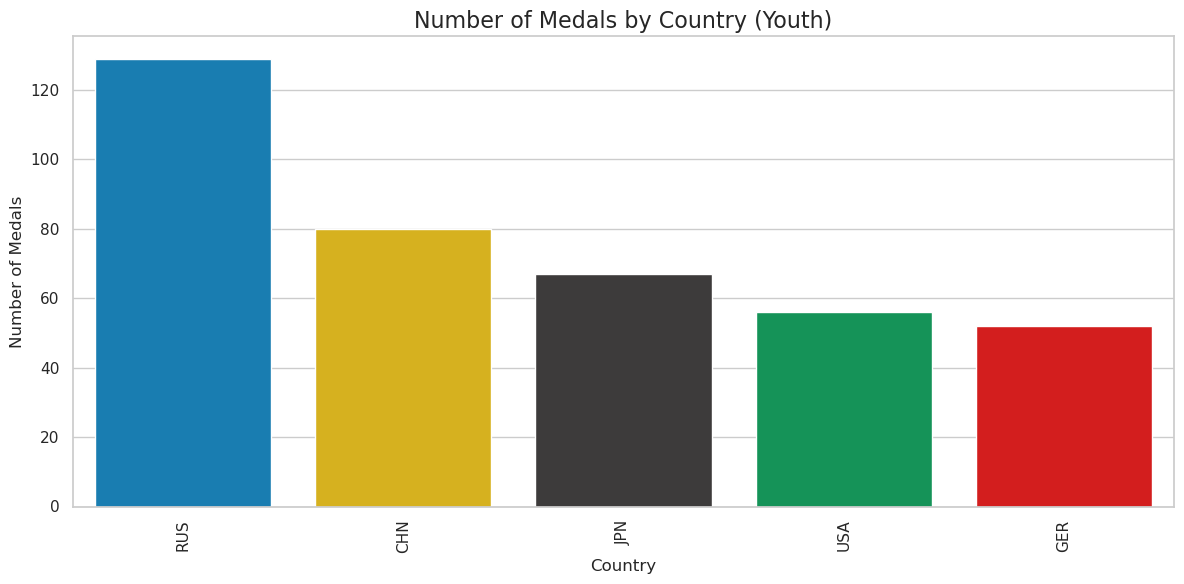

/tmp/ipykernel_7445/2310014942.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=non_yog_medal_counts, x='noc', y='medals', palette=olympic_colors)


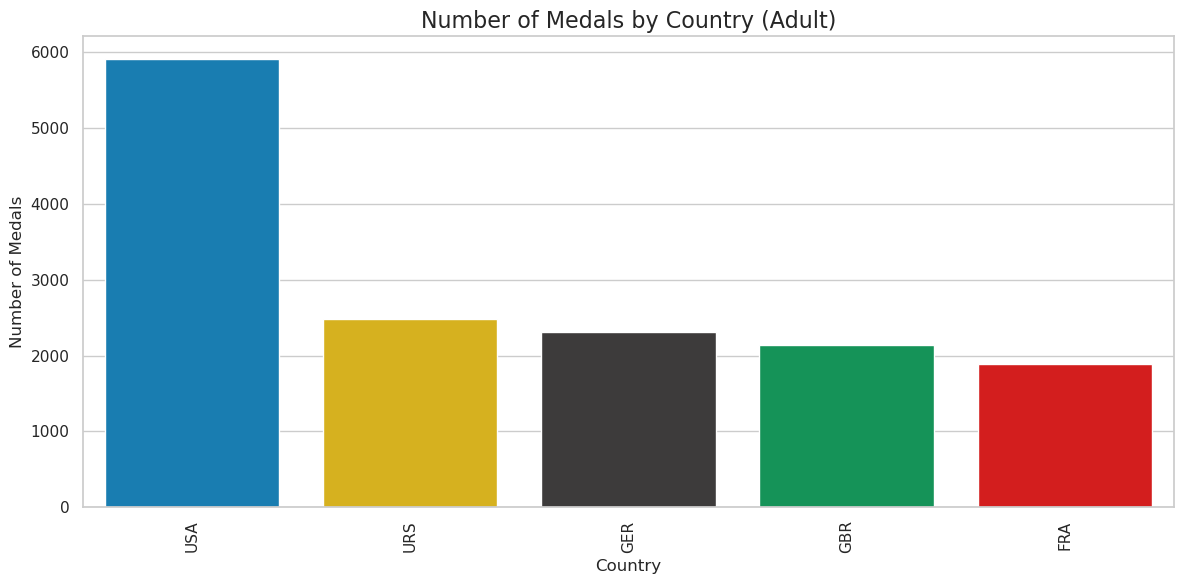

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

#PREGUNTA 2

# Paso 1: Filtrar los datos
medalists_df = df3.dropna(subset=['medal'])

# Dividir en dos conjuntos
yog_medalists = medalists_df[medalists_df['event'].str.contains('YOG')]
non_yog_medalists = medalists_df[~medalists_df['event'].str.contains('YOG')]

# Paso 2: Contar medallas por país
yog_medal_counts = yog_medalists.groupby('noc').size().reset_index(name='medals').sort_values(by='medals', ascending=False).head(5)
non_yog_medal_counts = non_yog_medalists.groupby('noc').size().reset_index(name='medals').sort_values(by='medals', ascending=False).head(5)

# Colores olímpicos básicos
olympic_colors = ['#0085CA', '#F4C300', '#3E3A3A', '#00A859', '#F10000']

# Gráfico para YOG
plt.figure(figsize=(12, 6))
sns.barplot(data=yog_medal_counts, x='noc', y='medals', palette=olympic_colors)
plt.title("Number of Medals by Country (Youth)", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Medals", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Gráfico para No YOG
plt.figure(figsize=(12, 6))
sns.barplot(data=non_yog_medal_counts, x='noc', y='medals', palette=olympic_colors)
plt.title("Number of Medals by Country (Adult)", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Medals", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


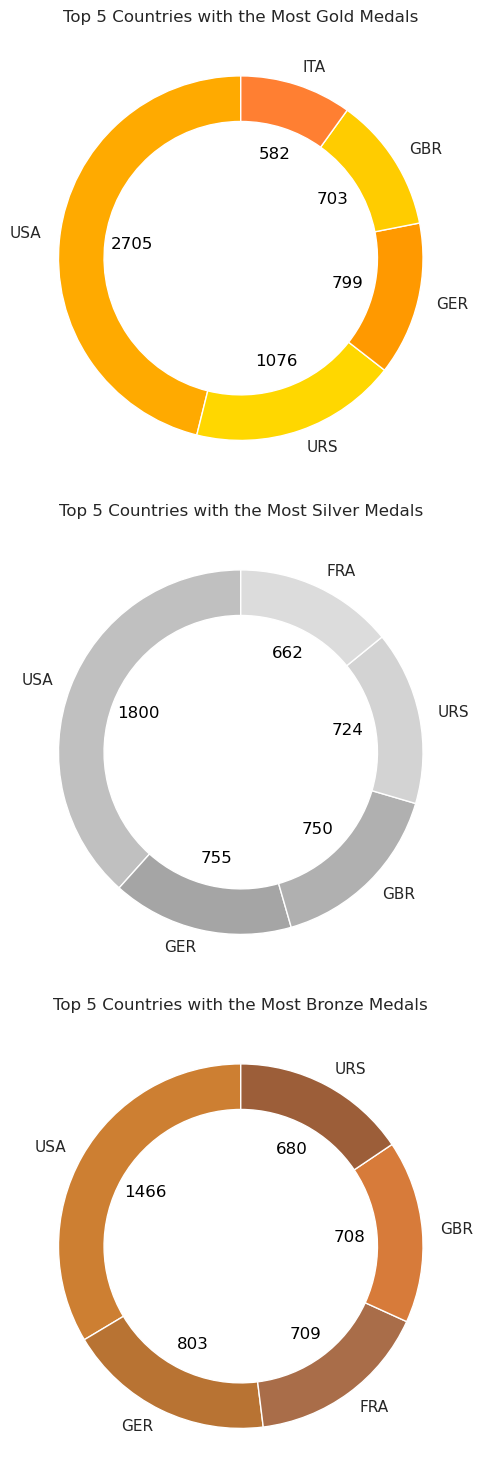

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

#PREGUNTA 2

# Paso 1: Filtrar los datos para cada tipo de medalla (oro, plata, bronce)
gold_medalists = df3[df3['medal'] == 'Gold']
silver_medalists = df3[df3['medal'] == 'Silver']
bronze_medalists = df3[df3['medal'] == 'Bronze']

# Paso 2: Contar medallas por país para cada tipo
gold_medal_counts = gold_medalists.groupby('noc').size().sort_values(ascending=False).head(5)
silver_medal_counts = silver_medalists.groupby('noc').size().sort_values(ascending=False).head(5)
bronze_medal_counts = bronze_medalists.groupby('noc').size().sort_values(ascending=False).head(5)

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Paso 3: Crear los pie charts (con efecto de anillo) con matplotlib, pero manteniendo el estilo Seaborn
plt.figure(figsize=(15, 15))

# Gráfico para medallas de oro (más contraste)
plt.subplot(3, 1, 1)
wedges, texts, autotexts = plt.pie(gold_medal_counts, 
                                   labels=gold_medal_counts.index, 
                                   autopct='%1.1f%%', 
                                   startangle=90, 
                                   colors=['#FFAA00', '#FFD700', '#FF9900', '#FFCC00', '#FF7F32'],  # Colores oro más contrastantes
                                   wedgeprops={'width': 0.25})  # Efecto anillo

# Reemplazar los porcentajes por los valores de medallas de oro
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{gold_medal_counts.iloc[i]}')

# Estilo de las letras dentro del gráfico
for i, autotext in enumerate(autotexts):
    if ['#FFAA00', '#FFD700', '#FF9900', '#FFCC00', '#FF7F32'][i] == '#FFD700':  # Si es el oro
        autotext.set_color('black')
    else:
        autotext.set_color('black')

plt.title("Top 5 Countries with the Most Gold Medals")
plt.ylabel('')

# Gráfico para medallas de plata (más contraste)
plt.subplot(3, 1, 2)
wedges, texts, autotexts = plt.pie(silver_medal_counts, 
                                   labels=silver_medal_counts.index, 
                                   autopct='%1.1f%%', 
                                   startangle=90, 
                                   colors=['#C0C0C0', '#A5A5A5', '#B0B0B0', '#D3D3D3', '#DCDCDC'],  # Colores plata más contrastantes
                                   wedgeprops={'width': 0.25})  # Efecto anillo

# Reemplazar los porcentajes por los valores de medallas de plata
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{silver_medal_counts.iloc[i]}')

# Estilo de las letras dentro del gráfico
for i, autotext in enumerate(autotexts):
    autotext.set_color('black')

plt.title("Top 5 Countries with the Most Silver Medals")
plt.ylabel('')

# Gráfico para medallas de bronce (más contraste)
plt.subplot(3, 1, 3)
wedges, texts, autotexts = plt.pie(bronze_medal_counts, 
                                   labels=bronze_medal_counts.index, 
                                   autopct='%1.1f%%', 
                                   startangle=90, 
                                   colors=['#CD7F32', '#B87333', '#A96D49', '#D77B3A', '#9C5E39'],  # Colores bronce más contrastantes
                                   wedgeprops={'width': 0.25})  # Efecto anillo

# Reemplazar los porcentajes por los valores de medallas de bronce
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{bronze_medal_counts.iloc[i]}')

# Estilo de las letras dentro del gráfico
for i, autotext in enumerate(autotexts):
    autotext.set_color('black')

plt.title("Top 5 Countries with the Most Bronze Medals")
plt.ylabel('')

# Ajuste de layout para evitar que se solapen los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


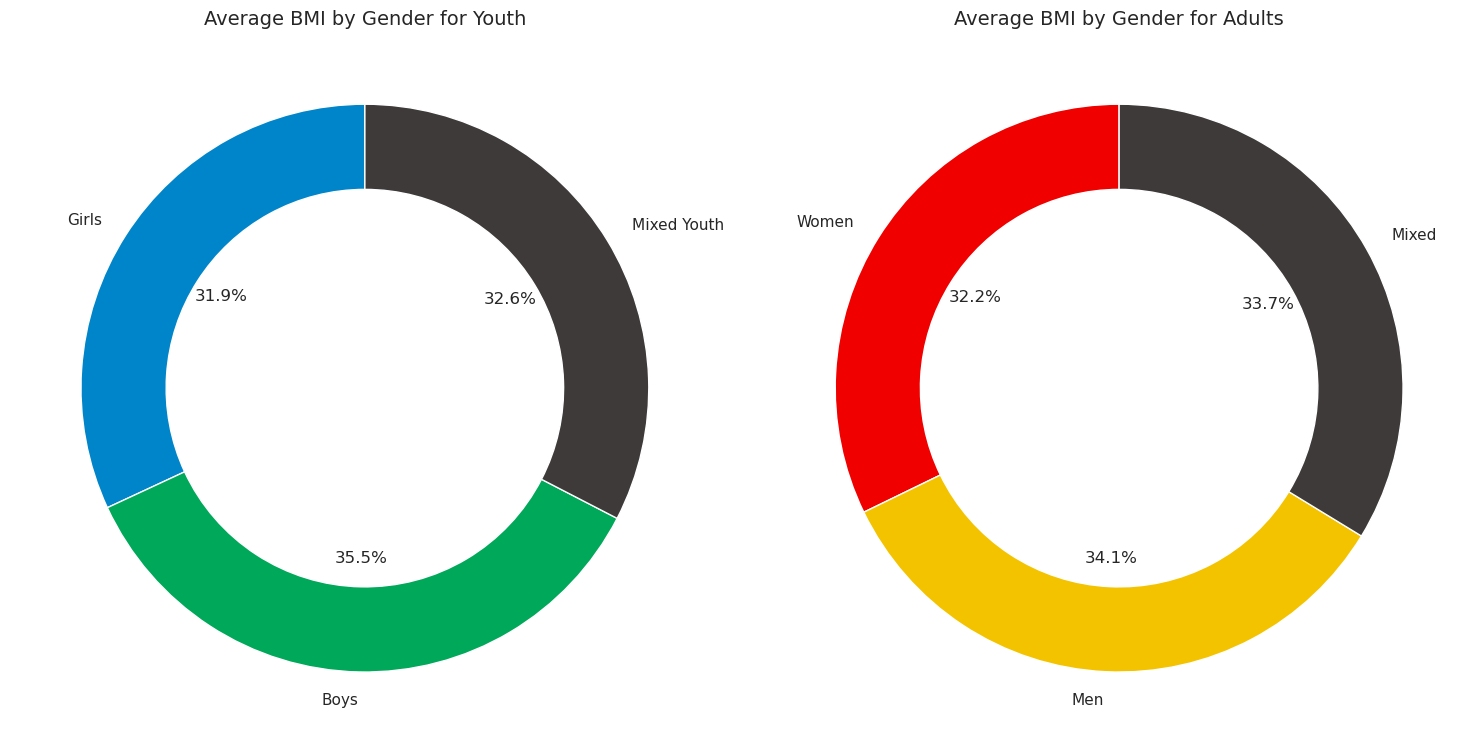

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#PREGUNTA 3

# Paso 1: Filtrar atletas con medalla y hacer una copia para evitar la advertencia
medalists_df = df3.dropna(subset=['medal', 'weight_kg', 'height_cm']).copy()

# Paso 2: Calcular el BMI para los atletas con medalla
medalists_df['BMI'] = medalists_df['weight_kg'] / (medalists_df['height_cm'] / 100) ** 2

# Paso 3: Filtrar por eventos YOG y no YOG
yog_medalists = medalists_df[medalists_df['event'].str.contains('YOG', case=False, na=False)]
non_yog_medalists = medalists_df[~medalists_df['event'].str.contains('YOG', case=False, na=False)]

# Paso 4: Filtrar por géneros
# Para no YOG (mujeres, hombres, y mezclado)
non_yog_women = non_yog_medalists[non_yog_medalists['event'].str.contains('women', case=False, na=False)]
non_yog_men = non_yog_medalists[non_yog_medalists['event'].str.contains('men', case=False, na=False)]
non_yog_mixed = non_yog_medalists[non_yog_medalists['event'].str.contains('mixed', case=False, na=False)]

# Para YOG (chicas, chicos, y mixto juvenil)
yog_girls = yog_medalists[yog_medalists['event'].str.contains('girls', case=False, na=False)]
yog_boys = yog_medalists[yog_medalists['event'].str.contains('boys', case=False, na=False)]
yog_mixed_youth = yog_medalists[yog_medalists['event'].str.contains('mixed youth', case=False, na=False)]

# Paso 5: Calcular el BMI promedio por género en cada grupo (YOG y no YOG)
# Para YOG
yog_bmi_by_gender = {
    'Girls': yog_girls.groupby('discipline')['BMI'].mean(),
    'Boys': yog_boys.groupby('discipline')['BMI'].mean(),
    'Mixed Youth': yog_mixed_youth.groupby('discipline')['BMI'].mean()
}

# Para no YOG
non_yog_bmi_by_gender = {
    'Women': non_yog_women.groupby('discipline')['BMI'].mean(),
    'Men': non_yog_men.groupby('discipline')['BMI'].mean(),
    'Mixed': non_yog_mixed.groupby('discipline')['BMI'].mean()
}

# Convertir los resultados a DataFrame para que sea más fácil de trabajar
yog_bmi_by_gender_df = pd.DataFrame(yog_bmi_by_gender)
non_yog_bmi_by_gender_df = pd.DataFrame(non_yog_bmi_by_gender)

# Paso 6: Crear los gráficos de pie para YOG y no YOG
plt.figure(figsize=(15, 8))

# Colores olímpicos + color neutro
olympic_colors_yog = ['#0085CA', '#00A859', '#3E3A3A']  # Colores olímpicos + gris neutro
olympic_colors_non_yog = ['#F10000', '#F4C300', '#3E3A3A']  # Mismo conjunto de colores

# Gráfico de pie para el grupo YOG
plt.subplot(1, 2, 1)
yog_bmi_by_gender_df.mean().plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3}, colors=olympic_colors_yog)
plt.title("Average BMI by Gender for Youth", fontsize=14)
plt.ylabel('')

# Gráfico de pie para el grupo no YOG
plt.subplot(1, 2, 2)
non_yog_bmi_by_gender_df.mean().plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3}, colors=olympic_colors_non_yog)
plt.title("Average BMI by Gender for Adults", fontsize=14)
plt.ylabel('')

# Ajuste del diseño para que no se superpongan los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


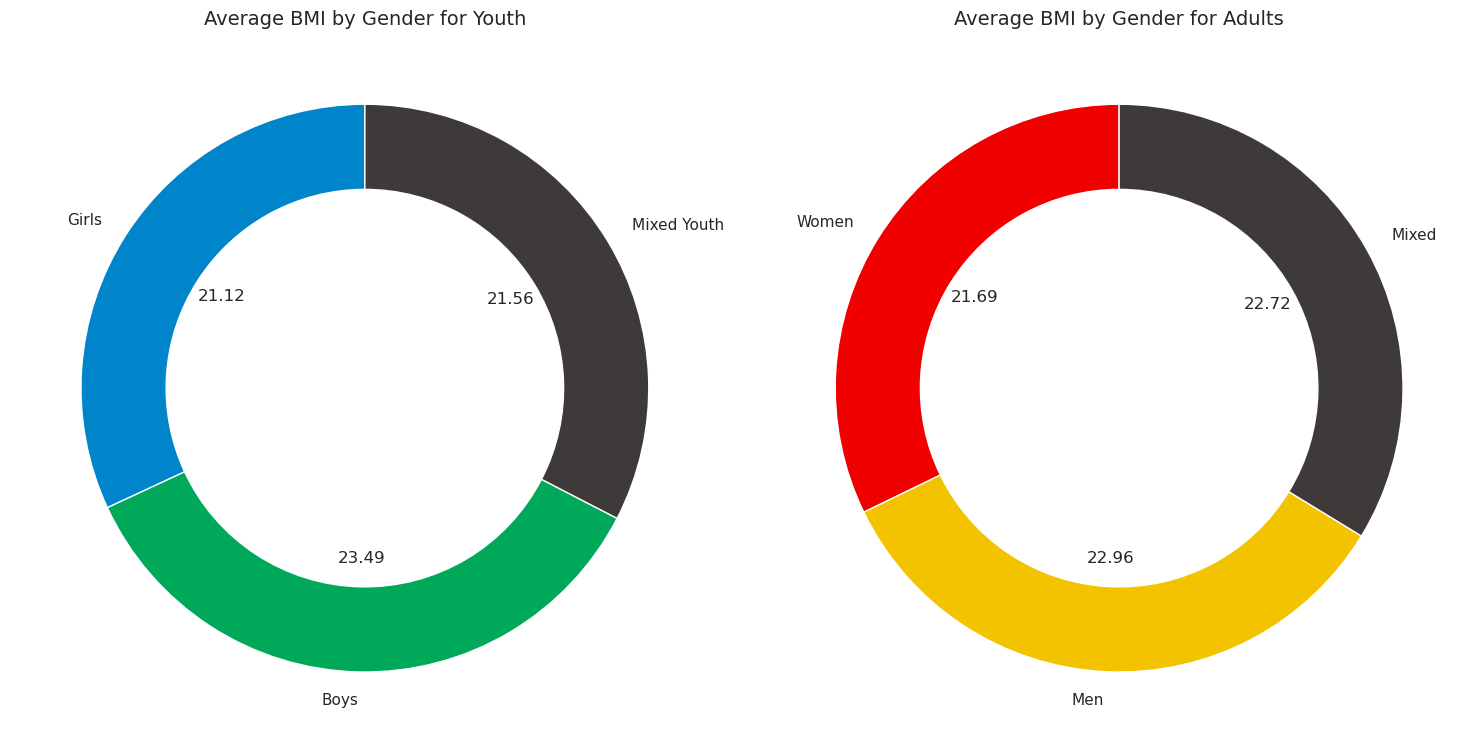

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt



# Paso 1: Filtrar atletas con medalla y hacer una copia para evitar la advertencia
medalists_df = df3.dropna(subset=['medal', 'weight_kg', 'height_cm']).copy()

# Paso 2: Calcular el BMI para los atletas con medalla
medalists_df['BMI'] = medalists_df['weight_kg'] / (medalists_df['height_cm'] / 100) ** 2

# Paso 3: Filtrar por eventos YOG y no YOG
yog_medalists = medalists_df[medalists_df['event'].str.contains('YOG', case=False, na=False)]
non_yog_medalists = medalists_df[~medalists_df['event'].str.contains('YOG', case=False, na=False)]

# Paso 4: Filtrar por géneros
# Para no YOG (mujeres, hombres, y mezclado)
non_yog_women = non_yog_medalists[non_yog_medalists['event'].str.contains('women', case=False, na=False)]
non_yog_men = non_yog_medalists[non_yog_medalists['event'].str.contains('men', case=False, na=False)]
non_yog_mixed = non_yog_medalists[non_yog_medalists['event'].str.contains('mixed', case=False, na=False)]

# Para YOG (chicas, chicos, y mixto juvenil)
yog_girls = yog_medalists[yog_medalists['event'].str.contains('girls', case=False, na=False)]
yog_boys = yog_medalists[yog_medalists['event'].str.contains('boys', case=False, na=False)]
yog_mixed_youth = yog_medalists[yog_medalists['event'].str.contains('mixed youth', case=False, na=False)]

# Paso 5: Calcular el BMI promedio por género en cada grupo (YOG y no YOG)
# Para YOG
yog_bmi_by_gender = {
    'Girls': yog_girls.groupby('discipline')['BMI'].mean(),
    'Boys': yog_boys.groupby('discipline')['BMI'].mean(),
    'Mixed Youth': yog_mixed_youth.groupby('discipline')['BMI'].mean()
}

# Para no YOG
non_yog_bmi_by_gender = {
    'Women': non_yog_women.groupby('discipline')['BMI'].mean(),
    'Men': non_yog_men.groupby('discipline')['BMI'].mean(),
    'Mixed': non_yog_mixed.groupby('discipline')['BMI'].mean()
}

# Convertir los resultados a DataFrame para que sea más fácil de trabajar
yog_bmi_by_gender_df = pd.DataFrame(yog_bmi_by_gender)
non_yog_bmi_by_gender_df = pd.DataFrame(non_yog_bmi_by_gender)

# Paso 6: Crear los gráficos de pie para YOG y no YOG con BMI en lugar de porcentaje
plt.figure(figsize=(15, 8))

# Gráfico de pie para el grupo YOG
plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie(
    yog_bmi_by_gender_df.mean(), 
    labels=yog_bmi_by_gender_df.columns, 
    startangle=90, 
    wedgeprops={'width': 0.3}, 
    colors=['#0085CA', '#00A859', '#3E3A3A'], 
    autopct='%1.1f%%'  # Esto se usa para tener el texto en el gráfico, pero lo vamos a modificar
)

# Reemplazamos los porcentajes por los BMI en el gráfico
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{yog_bmi_by_gender_df.mean().iloc[i]:.2f}')  # Muestra el BMI en lugar del porcentaje

plt.title("Average BMI by Gender for Youth", fontsize=14)
plt.ylabel('')

# Gráfico de pie para el grupo no YOG
plt.subplot(1, 2, 2)
wedges, texts, autotexts = plt.pie(
    non_yog_bmi_by_gender_df.mean(), 
    labels=non_yog_bmi_by_gender_df.columns, 
    startangle=90, 
    wedgeprops={'width': 0.3}, 
    colors=['#F10000', '#F4C300', '#3E3A3A'],
    autopct='%1.1f%%'  # Lo usamos para que se vean los textos, pero los reemplazamos por los BMI
)

# Reemplazamos los porcentajes por los BMI en el gráfico
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{non_yog_bmi_by_gender_df.mean().iloc[i]:.2f}')  # Muestra el BMI en lugar del porcentaje

plt.title("Average BMI by Gender for Adults", fontsize=14)
plt.ylabel('')

# Ajuste del diseño para que no se superpongan los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


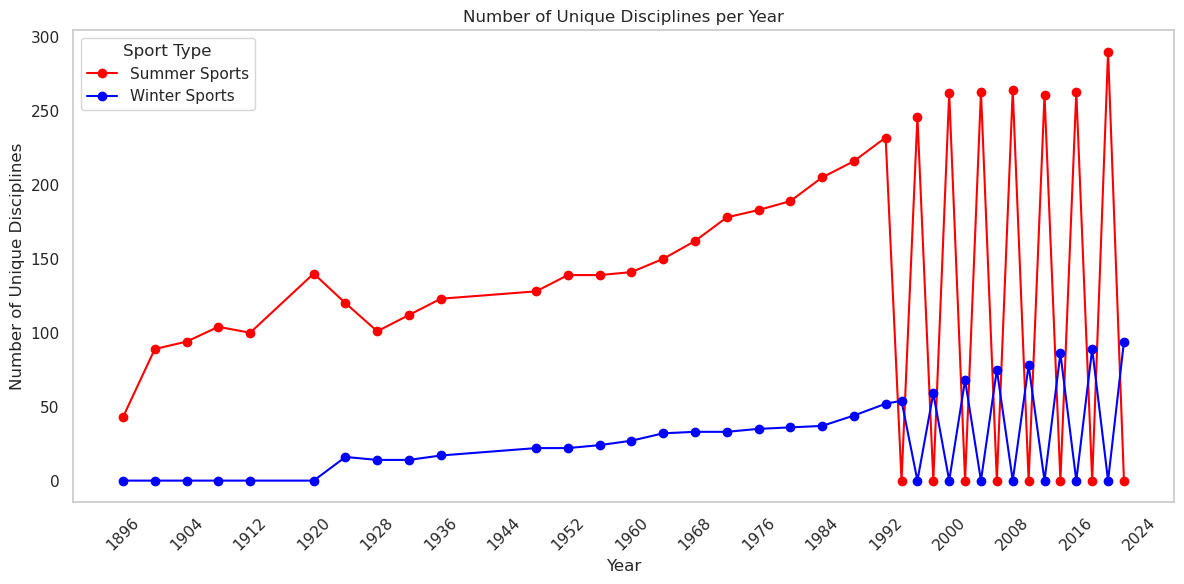

In [137]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

#Filtrar el DataFrame para incluir solo eventos que contengan "Olympic" en el nombre de la disciplina
df_filtered = df2[(df2['event'].str.contains("Olympic", case=False))]

#Contar disciplinas únicas por año y tipo en el DataFrame filtrado
unique_disciplines = df_filtered.groupby(['year', 'type'], observed=False)['event'].nunique().reset_index()

#Pivotar los datos para que cada tipo de deporte sea una columna
pivot_table = unique_disciplines.pivot(index='year', columns='type', values='event').fillna(0)

#Graficar
plt.figure(figsize=(12, 6))
plt.plot(pivot_table.index, pivot_table['Summer'], color='red', marker='o', label='Summer Sports')
plt.plot(pivot_table.index, pivot_table['Winter'], color='blue', marker='o', label='Winter Sports')

#Personalizar el gráfico
plt.title("Number of Unique Disciplines per Year")
plt.xlabel("Year")
plt.ylabel("Number of Unique Disciplines")

#Ajustar las etiquetas del eje X para mostrar más años
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=20))  # Ajusta 'nbins' según la cantidad de etiquetas que desees

plt.legend(title='Sport Type')
plt.grid()

#Mostrar el gráfico
plt.tight_layout()
plt.show()

NameError: name 'MaxNLocator' is not defined

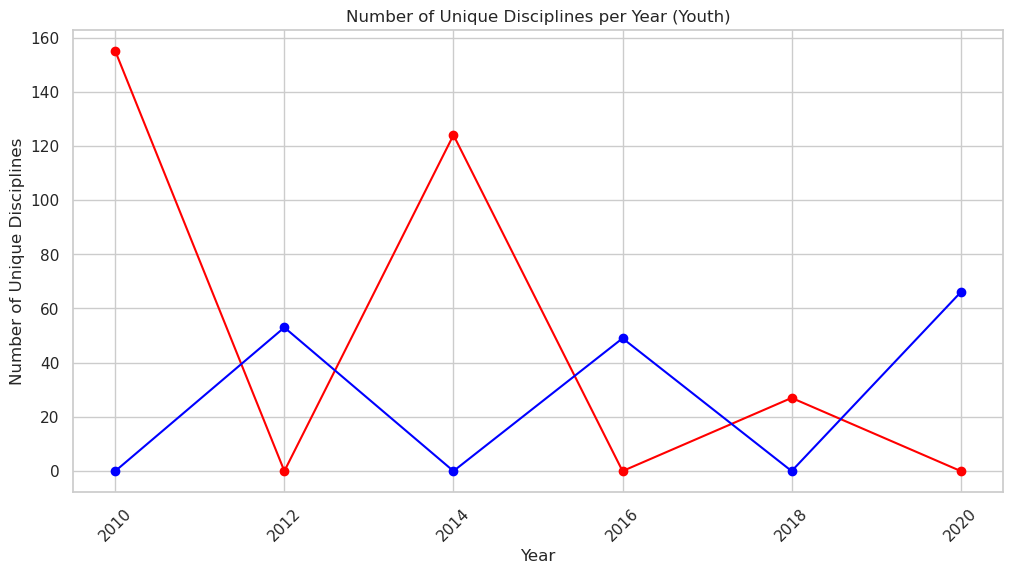

In [134]:
#tendencia de numero de disciplinas por año (YOG):

#Filtrar el DataFrame para incluir solo eventos que contengan "Olympic" en el nombre de la disciplina
df_filtered = df2[(df2['event'].str.contains("YOG", case=False))]

#Contar disciplinas únicas por año y tipo en el DataFrame filtrado
unique_disciplines = df_filtered.groupby(['year', 'type'], observed=False)['event'].nunique().reset_index()

#Pivotar los datos para que cada tipo de deporte sea una columna
pivot_table = unique_disciplines.pivot(index='year', columns='type', values='event').fillna(0)

#Graficar
plt.figure(figsize=(12, 6))
plt.plot(pivot_table.index, pivot_table['Summer'], color='red', marker='o', label='Summer Sports')
plt.plot(pivot_table.index, pivot_table['Winter'], color='blue', marker='o', label='Winter Sports')

#Personalizar el gráfico
plt.title("Number of Unique Disciplines per Year (Youth)")
plt.xlabel("Year")
plt.ylabel("Number of Unique Disciplines")

#Ajustar las etiquetas del eje X para mostrar más años
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=20))  # Ajusta 'nbins' según la cantidad de etiquetas que desees

plt.legend(title='Sport Type')
plt.grid()

#Mostrar el gráfico
plt.tight_layout()
plt.show()

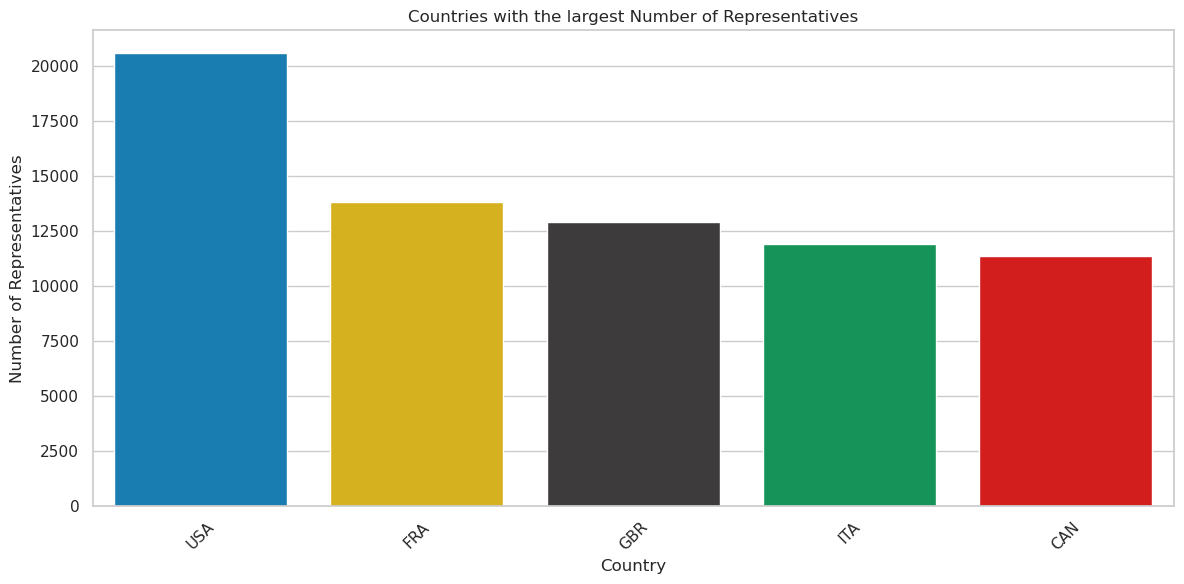

In [120]:
#Contar la cantidad de representantes por país
country_counts = df3['noc'].value_counts().head(5)

#Configurar el estilo del gráfico
sns.set(style="whitegrid")

#Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, hue = country_counts.index , palette=olympic_colors)

#Personalizar el gráfico
plt.title("Countries with the largest Number of Representatives")
plt.xlabel("Country")
plt.ylabel("Number of Representatives")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

#Mostrar el gráfico
plt.tight_layout()
plt.show()

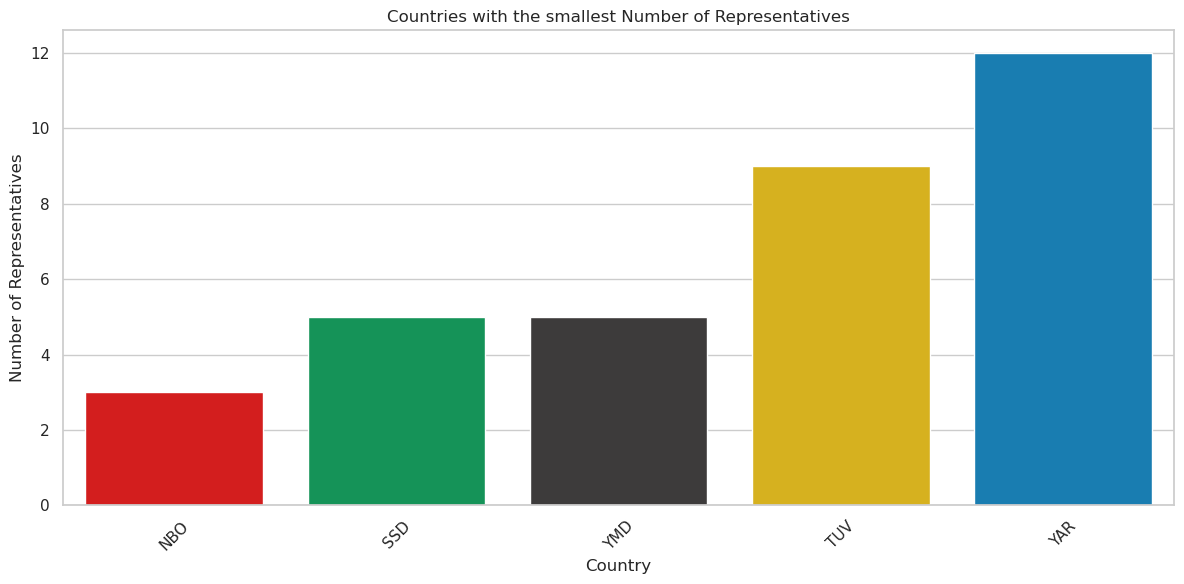

In [138]:
#Contar la cantidad de representantes por país
country_counts = df3['noc'].value_counts().tail(5)

#Configurar el estilo del gráfico
sns.set(style="whitegrid")

#Crear el gráfico de barras, ordenando de mayor a menor
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, hue=country_counts.index, palette=olympic_colors, 
            order=country_counts.index[::-1])  # Invertir el orden para mostrar las barras de mayor a menor

#Personalizar el gráfico
plt.title("Countries with the smallest Number of Representatives")
plt.xlabel("Country")
plt.ylabel("Number of Representatives")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

#Mostrar el gráfico
plt.tight_layout()
plt.show()